In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu
import pickle
import config
from utils.index_metrics import nbr, nbr2, bais2

Load randomly chosen images from the training data

In [20]:
img1_pre = io.imread('data/train/EMSR207_06MADEIRA_02GRADING_MAP_v2_vector/sentinel2_2017-05-25.png')
img1_post = io.imread('data/train/EMSR207_06MADEIRA_02GRADING_MAP_v2_vector/sentinel2_2017-07-04.png')
img2_pre = io.imread('data/train/EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector/sentinel2_2017-06-01.png')
img2_post = io.imread('data/train/EMSR209_04CHOZASDELAPOLEOSA_02GRADING_MAP_v1_vector/sentinel2_2017-07-01.png')
img3_pre = io.imread('data/train/EMSR217_03SLLATINE_02GRADING_MAP_v2_vector/sentinel2_2017-07-01.png')
img3_post= io.imread('data/train/EMSR217_03SLLATINE_02GRADING_MAP_v2_vector/sentinel2_2017-08-20.png')

Display loaded images

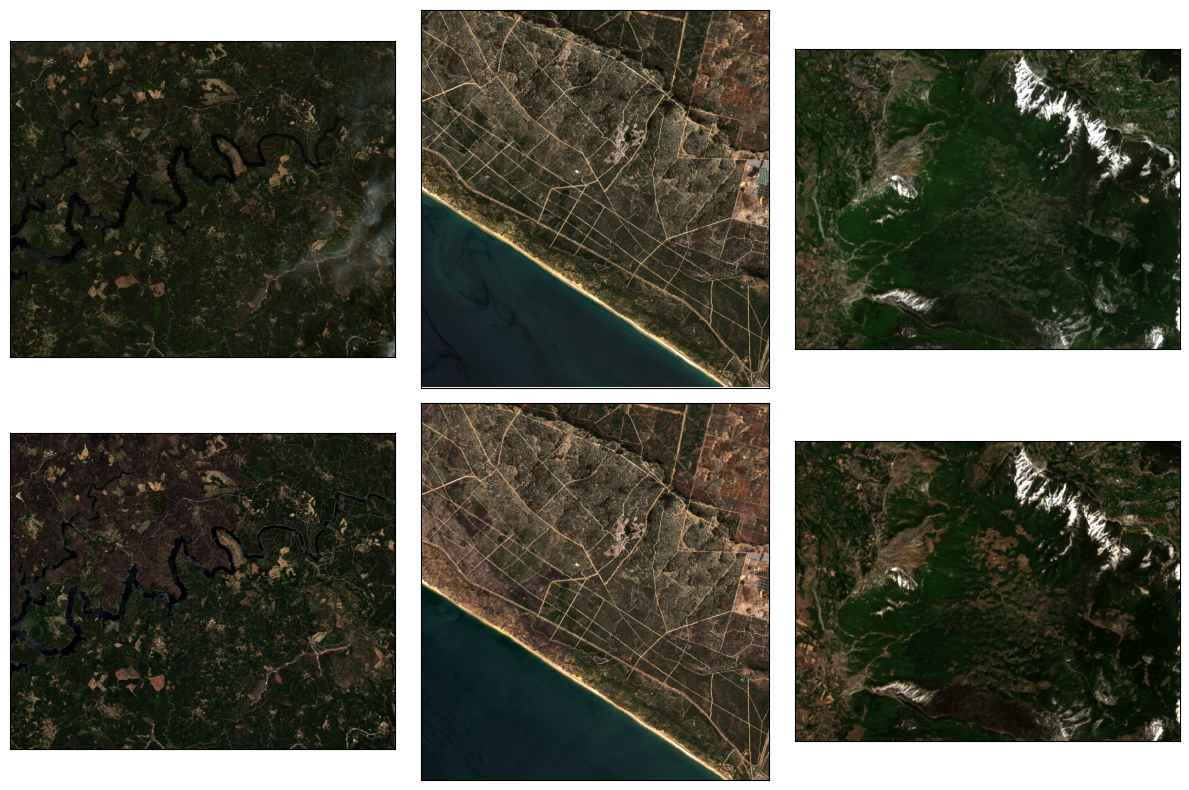

In [22]:
figure, ax = plt.subplots(2, 3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

ax[0, 0].imshow(img1_pre)
ax[1, 0].imshow(img1_post)
ax[0, 1].imshow(img2_pre)
ax[1, 1].imshow(img2_post)
ax[0, 2].imshow(img3_pre)
ax[1, 2].imshow(img3_post)

Load the collected images and preprocess them

In [2]:
bega_pre = io.imread('data/collected/roi_Bega_pre.tif')
bega_post = io.imread('data/collected/roi_Bega_post.tif')
bega_pre, bega_post = bega_pre / 10000., bega_post / 10000.

bruthen_pre = io.imread('data/collected/roi_Bruthen_pre.tif')
bruthen_post = io.imread('data/collected/roi_Bruthen_post.tif')
bruthen_pre, bruthen_post = bruthen_pre / 10000., bruthen_post / 10000.

canberra_pre = io.imread('data/collected/roi_Canberra_pre.tif')
canberra_post = io.imread('data/collected/roi_Canberra_post.tif')
canberra_pre, canberra_post = canberra_pre / 10000., canberra_post / 10000.

Display the collected images in the agricultural band combination (B11, B8, B2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


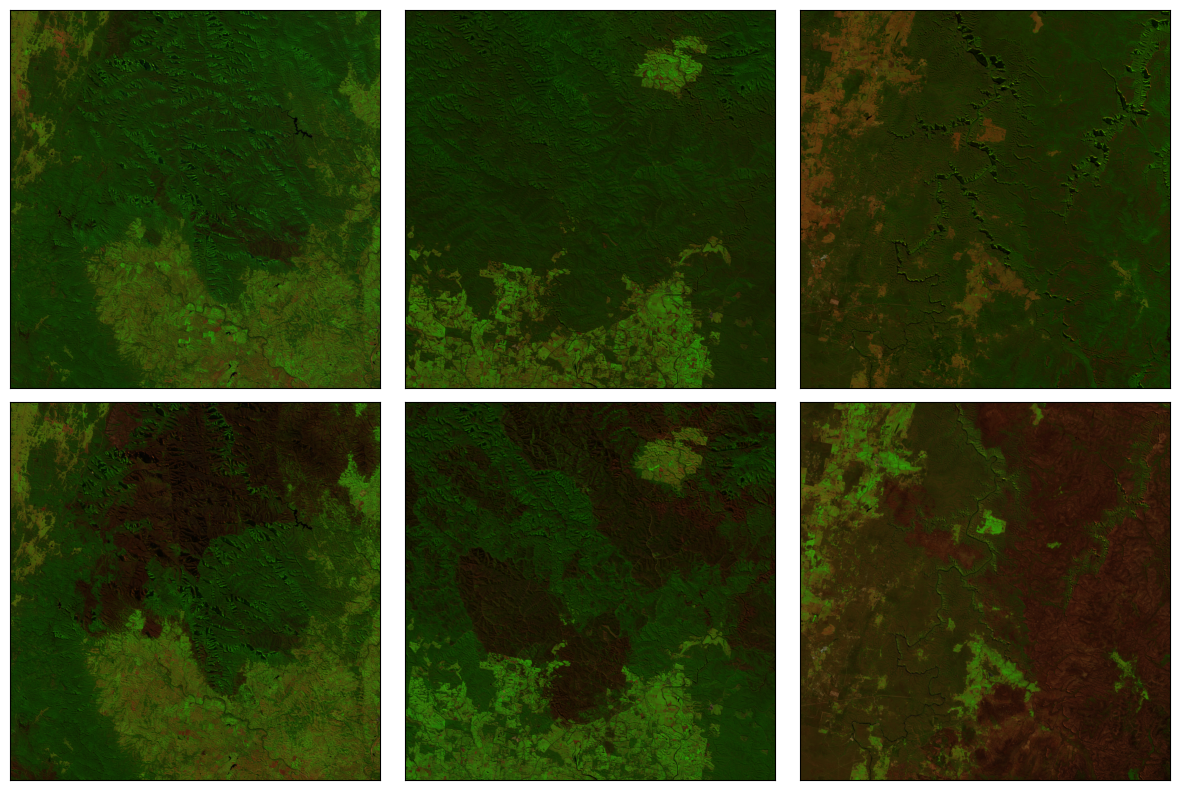

In [18]:
figure, ax = plt.subplots(2, 3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

ax[0, 0].imshow(bega_pre[:, :, [10, 7, 1]])
ax[1, 0].imshow(bega_post[:, :, [10, 7, 1]])
ax[0, 1].imshow(bruthen_pre[:, :, [10, 7, 1]])
ax[1, 1].imshow(bruthen_post[:, :, [10, 7, 1]])
ax[0, 2].imshow(canberra_pre[:, :, [10, 7, 1]])
ax[1, 2].imshow(canberra_post[:, :, [10, 7, 1]])

Load the model's training history

In [2]:
with open(config.HISTORY_PATH, 'rb') as f:
    history = pickle.load(f)

Plot the training history

Text(0.5, 0.98, 'Train and Test Performance: Loss, Dice and IoU')

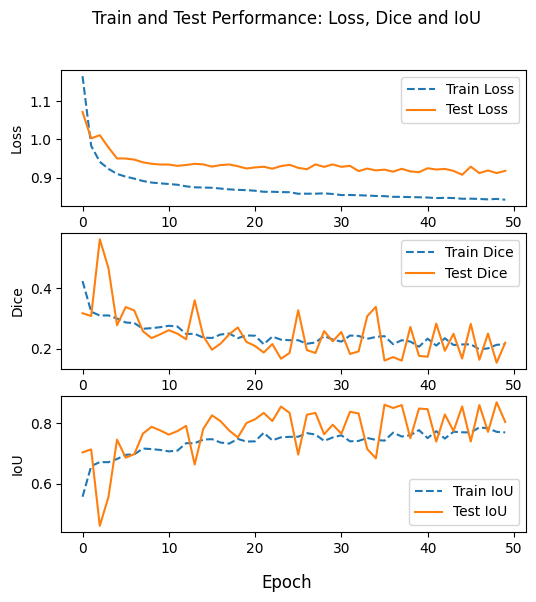

In [18]:
figure, ax = plt.subplots(3, 1, figsize=(6, 6))

ax[0].plot(history['train_loss'], '--', label='Train Loss')
ax[0].plot(history['test_loss'], label='Test Loss')
ax[0].set(ylabel='Loss')
ax[0].legend(loc='upper right')

ax[1].plot(history['train_dice'], '--', label='Train Dice')
ax[1].plot(history['test_dice'], label='Test Dice')
ax[1].set(ylabel='Dice')
ax[1].legend(loc='upper right')

ax[2].plot(history['train_iou'], '--', label='Train IoU')
ax[2].plot(history['test_iou'], label='Test IoU')
ax[2].set(ylabel='IoU')
ax[2].legend(loc='lower right')

figure.supxlabel('Epoch')
figure.suptitle('Train and Test Performance: Loss, Dice and IoU')

In [24]:
print(history['train_loss'][-1], history['train_dice'][-1], history['train_iou'][-1])
print(history['test_loss'][-1], history['test_dice'][-1], history['test_iou'][-1])

0.8422145720512147 0.21464722339438383 0.7699097421749559
0.9178801803361802 0.21973615884780884 0.8044628926685878


Load the predicted mask for the collected data

In [3]:
unet_bega = io.imread('output/masks/Bega_mask.png')
unet_bruthen = io.imread('output/masks/Bruthen_mask.png')
unet_canberra = io.imread('output/masks/Canberra_mask.png')

Apply index metrices on the collected images

In [4]:
dnbr_bega = nbr(bega_pre) - nbr(bega_post)
dnbr2_bega = nbr2(bega_pre) - nbr2(bega_post)
dbais2_bega = bais2(bega_pre) - bais2(bega_post)

dnbr_bruthen = nbr(bruthen_pre) - nbr(bruthen_post)
dnbr2_bruthen = nbr2(bruthen_pre) - nbr2(bruthen_post)
dbais2_bruthen = bais2(bruthen_pre) - bais2(bruthen_post)

dnbr_canberra = nbr(canberra_pre) - nbr(canberra_post)
dnbr2_canberra = nbr2(canberra_pre) - nbr2(canberra_post)
dbais2_canberra = bais2(canberra_pre) - bais2(canberra_post)

Display the comparison between the model's outcome and traditional techniques on the collected images

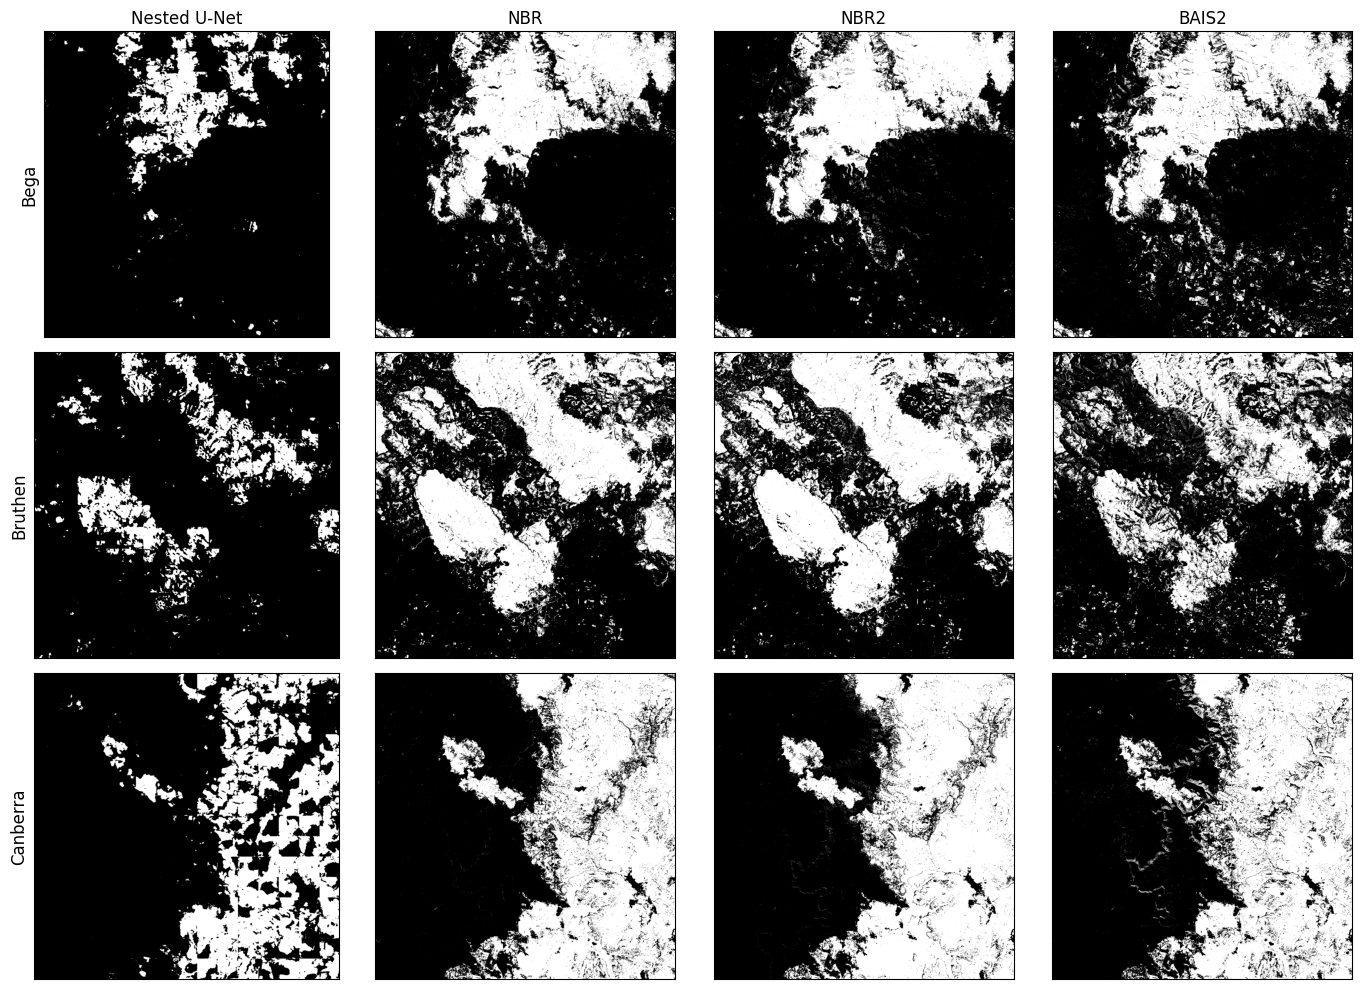

In [19]:
figure, ax = plt.subplots(3, 4, figsize=(14, 10), subplot_kw={'xticks': [], 'yticks': []})

cols = ['Nested U-Net', 'NBR', 'NBR2', 'BAIS2']
rows = ['Bega', 'Bruthen', 'Canberra']

for c, col in zip(ax[0], cols):
    c.set_title(col)

for r, row in zip(ax[:, 0], rows):
    r.set_ylabel(row, size='large')

ax[0, 0].imshow(unet_bega)
ax[0, 1].imshow(dnbr_bega > threshold_otsu(dnbr_bega), cmap='gray')
ax[0, 2].imshow(dnbr2_bega > threshold_otsu(dnbr2_bega), cmap='gray')
ax[0, 3].imshow(dbais2_bega < threshold_otsu(dbais2_bega), cmap='gray')

ax[1, 0].imshow(unet_bruthen)
ax[1, 1].imshow(dnbr_bruthen > threshold_otsu(dnbr_bruthen), cmap='gray')
ax[1, 2].imshow(dnbr2_bruthen > threshold_otsu(dnbr2_bruthen), cmap='gray')
ax[1, 3].imshow(dbais2_bruthen < threshold_otsu(dbais2_bruthen), cmap='gray')

ax[2, 0].imshow(unet_canberra)
ax[2, 1].imshow(dnbr_canberra > threshold_otsu(dnbr_canberra), cmap='gray')
ax[2, 2].imshow(dnbr2_canberra > threshold_otsu(dnbr2_canberra), cmap='gray')
ax[2, 3].imshow(dbais2_canberra < threshold_otsu(dbais2_canberra), cmap='gray')

figure.tight_layout()